# Giới thiệu các trường dữ liệu

1. ID: Mã số cá nhân.
2. Age: Tuổi của cá nhân.
3. Sex: Giới tính của cá nhân (MALE = 1 hoặc FEMALE = 0).
4. Region: Khu vực sống của cá nhân (INNER_CITY = 3, TOWN = 2, SUBURBAN = 1 , hoặc RURAL= 0).
5. Income: Thu nhập của cá nhân.
6. Married: Trạng thái hôn nhân (YES = 0 hoặc NO = 1).
7. Children: Số lượng con cá nhân có.
8. Car: Có xe hơi hay không (YES = 0 hoặc NO = 1).
9. Save_act: Có tài khoản tiết kiệm hay không (YES = 0 hoặc NO = 1).
10. Current_act: Có tài khoản ngân hàng hiện tại hay không (YES = 0 hoặc NO = 1).
11. Mortgage: Có khoản thế chấp nhà ở hay không (YES = 0 hoặc NO = 1).
12. PEP: Có tham gia kế hoạch tiết kiệm dài hạn cá nhân (Personal Equity Plan) hay không (YES = 0 hoặc NO = 1).

# Phân tích dữ liệu

In [2]:
import matplotlib.pyplot as plt # thư viện vẽ đồ thị
import numpy as np # thư viện toán học
import pandas as pd # thư viện xử lý dữ liệu
import seaborn as sns # thư viện vẽ đồ thị

from sklearn.svm import SVC # thư viện SVM
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix # thư viện đánh giá mô hình
from sklearn.model_selection import train_test_split # thư viện chia dữ liệu thành tập huấn luyện và tập kiểm tra
from sklearn.preprocessing import StandardScaler # thư viện chuẩn hóa dữ liệu

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Đọc dữ liệu từ file CSV
file_path = "/content/drive/MyDrive/SVM_BankData/bank-data_xuly.csv"
data = pd.read_csv(file_path, index_col="id")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, ID12101 to ID12700
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          600 non-null    int64  
 1   sex          600 non-null    int64  
 2   region       600 non-null    int64  
 3   income       600 non-null    float64
 4   married      600 non-null    int64  
 5   children     600 non-null    int64  
 6   car          600 non-null    int64  
 7   save_act     600 non-null    int64  
 8   current_act  600 non-null    int64  
 9   mortgage     600 non-null    int64  
 10  pep          600 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 56.2+ KB


Không tồn tại giá trị NULL trong bộ dữ liệu.

In [6]:
data.head()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
id,,,,,,,,,,,
ID12101,48,0,3,17546.0,1,1,1,1,1,1,0
ID12102,40,1,2,30085.1,0,3,0,1,0,0,1
ID12103,51,0,3,16575.4,0,0,0,0,0,1,1
ID12104,23,0,2,20375.4,0,3,1,1,0,1,1
ID12105,57,0,0,50576.3,0,0,1,0,1,1,1


In [7]:
data.drop(columns="pep").describe()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,42.395000,0.500000,2.025000,27524.031217,0.340000,1.011667,0.506667,0.310000,0.241667,0.651667
std,14.424947,0.500417,1.092259,12899.468246,0.474104,1.056752,0.500373,0.462879,0.428451,0.476840
min,18.000000,0.000000,0.000000,5014.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,17264.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42.000000,0.500000,2.000000,24925.300000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,55.250000,1.000000,3.000000,36172.675000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000
max,67.000000,1.000000,3.000000,63130.100000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# Đếm số lượng các giá trị trong cột "pep"
data["pep"].value_counts()

,count
pep,
1,326
0,274


# Trực quan hóa dữ liệu

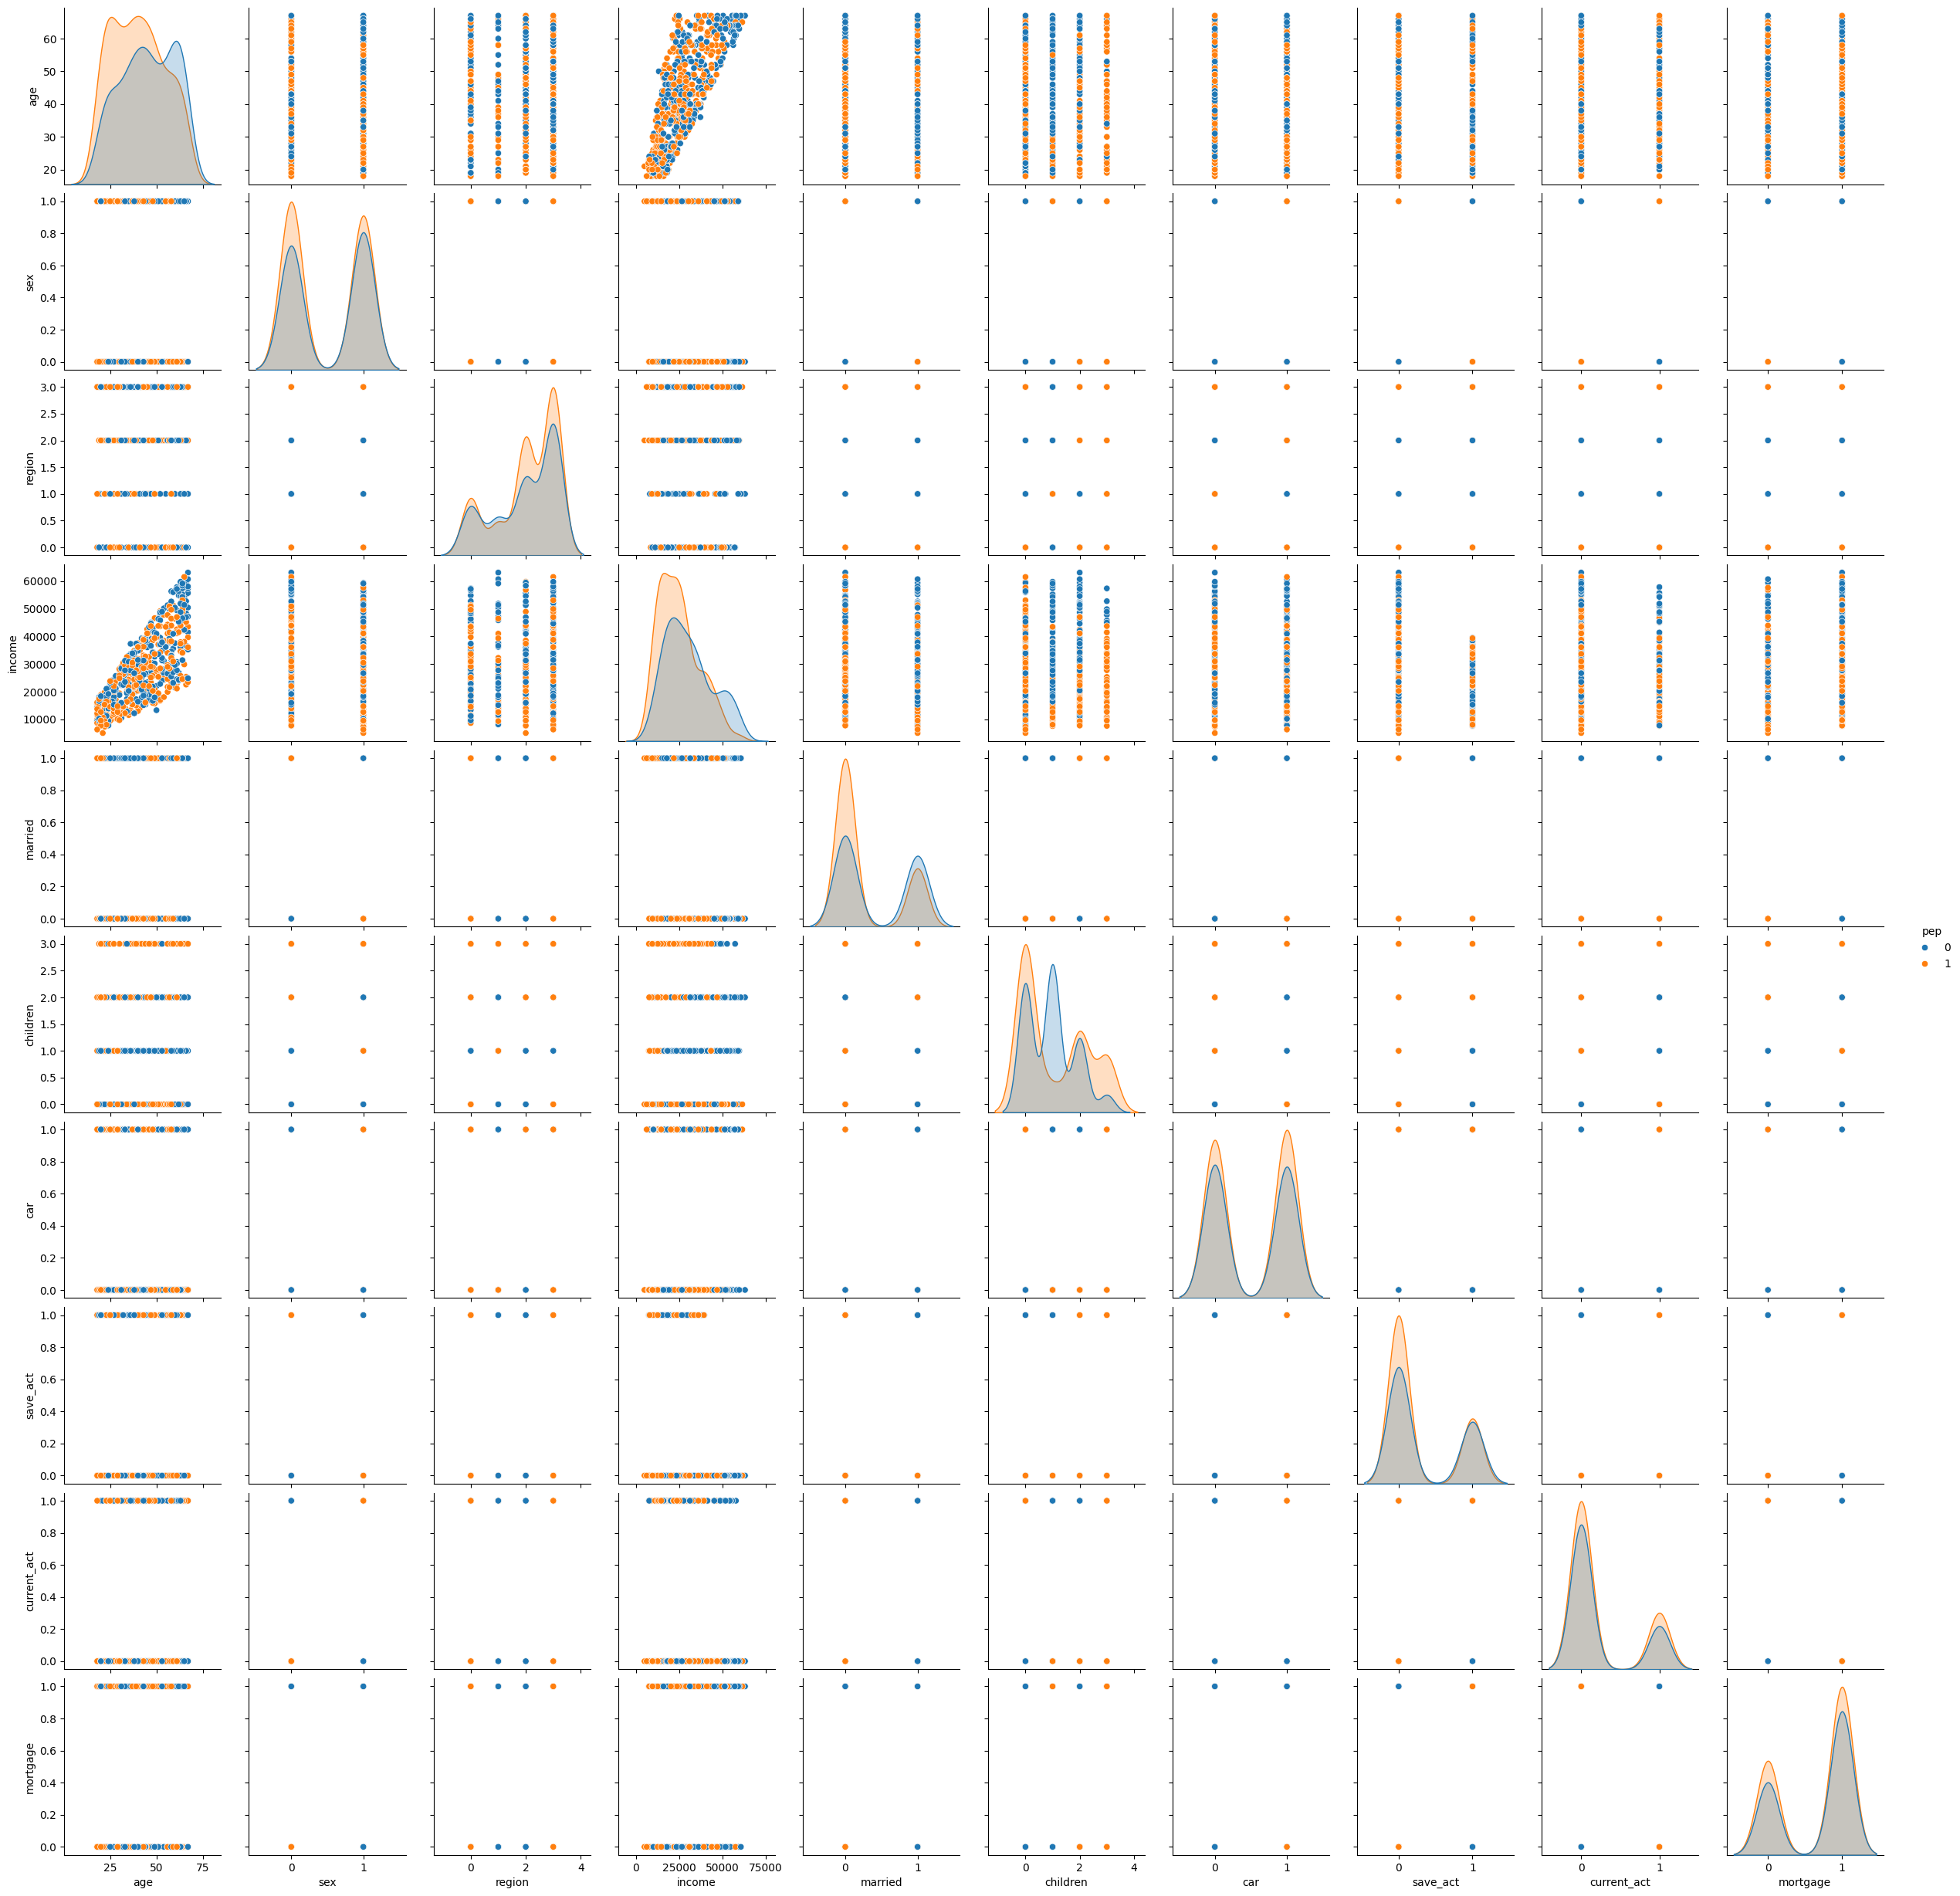

In [9]:
# tạo biểu đồ
sns.pairplot(data, hue="pep", corner=False)

<Axes: >

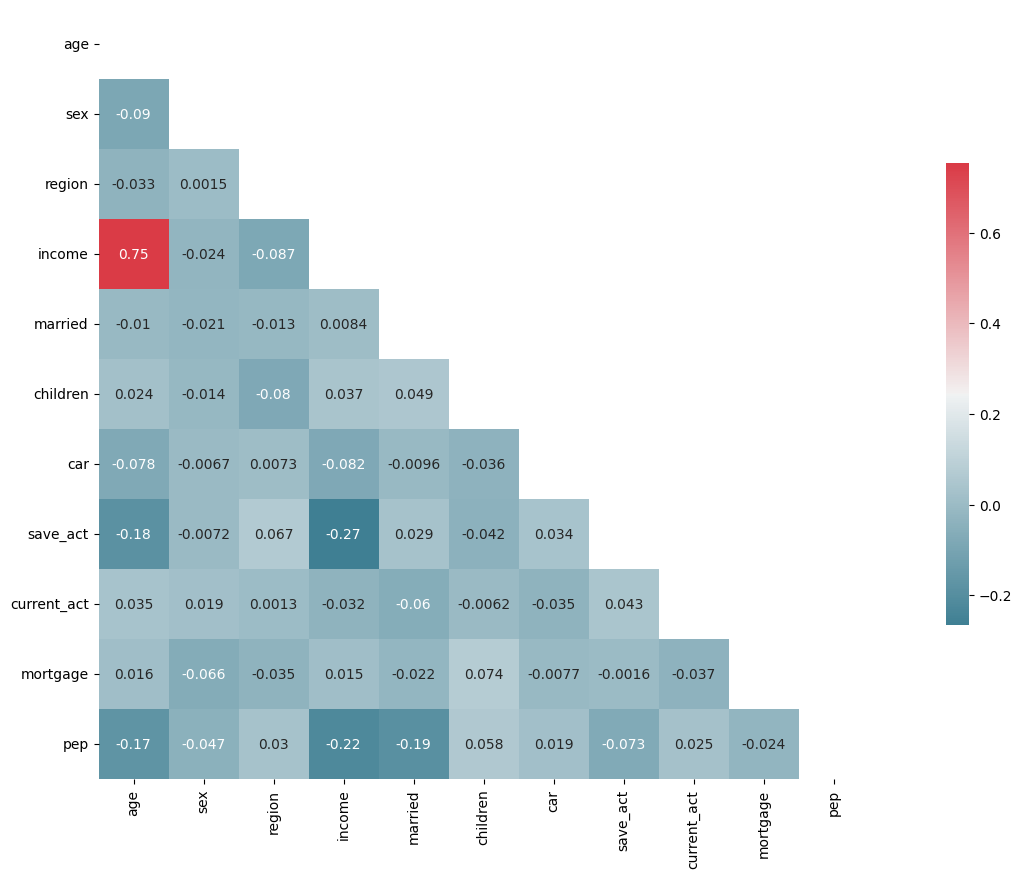

In [10]:
# Tính ma trận tương quan giữa các cột trong DataFrame
corr_mat = data.corr()

# Tạo một mặt nạ (mask) để che đi phần trên của ma trận (chỉ hiển thị phần dưới)
mask = np.zeros_like(corr_mat, dtype=bool)  # Tạo một mảng 2D với giá trị False
mask[np.triu_indices_from(mask)] = True    # Đánh dấu phần trên của ma trận (trên đường chéo chính) là True

# Tạo một biểu đồ với kích thước 20x10
plt.subplots(figsize=(20, 10))

# Tạo bảng màu phân kỳ (diverging palette) để hiển thị các giá trị tương quan
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Vẽ biểu đồ heatmap để hiển thị ma trận tương quan
sns.heatmap(
    corr_mat,          # Ma trận tương quan
    cmap=cmap,         # Bảng màu
    mask=mask,         # Mặt nạ để ẩn phần trên của ma trận
    square=True,       # Giữ các ô vuông
    annot=True,        # Hiển thị giá trị tương quan trong từng ô
    cbar_kws={"shrink": 0.6}  # Thu nhỏ thanh màu (color bar) xuống 60% kích thước
)

#

In [11]:
# Tách dữ liệu đầu vào (features) và đầu ra (target)
X = data.drop(columns="pep").values  # X chứa tất cả các cột trừ cột "pep" (dữ liệu đầu vào)
y = data["pep"].values               # y chứa cột "pep" (biến mục tiêu)

# Chia dữ liệu thành tập huấn luyện (train) và kiểm tra (test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)
# - test_size=0.2: 20% dữ liệu được sử dụng làm tập kiểm tra, 80% làm tập huấn luyện.
# - shuffle=True: Xáo trộn dữ liệu trước khi chia.
# - random_state=42: Đảm bảo kết quả chia dữ liệu luôn giống nhau mỗi lần chạy.

# Chuẩn hóa dữ liệu (Standardization)
sc = StandardScaler()                # Tạo đối tượng chuẩn hóa
X_train = sc.fit_transform(X_train)  # Tính toán các thông số chuẩn hóa từ tập huấn luyện và áp dụng chuẩn hóa
X_test = sc.transform(X_test)        # Áp dụng chuẩn hóa lên tập kiểm tra (sử dụng thông số từ tập huấn luyện)

## SVM

In [12]:
classifier = SVC()  # Tạo một đối tượng SVM (Support Vector Classifier) với các tham số mặc định.
classifier.fit(X_train, y_train)  # Huấn luyện mô hình SVM trên tập huấn luyện (X_train, y_train).
y_pred = classifier.predict(X_test)  # Dự đoán nhãn (target) cho tập kiểm tra (X_test).
print("Accuracy:", accuracy_score(y_test, y_pred))  # Tính và in ra độ chính xác của mô hình.

Accuracy: 0.7416666666666667


In [13]:
cm = confusion_matrix(y_test, y_pred)  # Tính ma trận nhầm lẫn (Confusion Matrix) dựa trên nhãn thực tế (y_test) và nhãn dự đoán (y_pred).
print(pd.DataFrame(cm))  # Hiển thị ma trận nhầm lẫn dưới dạng DataFrame để dễ đọc hơn.
print(classification_report(y_test, y_pred))  # In báo cáo phân loại (Classification Report) bao gồm các chỉ số đánh giá mô hình.

    0   1
0  32  22
1   9  57
              precision    recall  f1-score   support

           0       0.78      0.59      0.67        54
           1       0.72      0.86      0.79        66

    accuracy                           0.74       120
   macro avg       0.75      0.73      0.73       120
weighted avg       0.75      0.74      0.74       120



In [14]:
import joblib

file_path = '/content/drive/MyDrive/SVM_BankData/svm_model.pkl'
# Lưu mô hình vào file 'svm_model.pkl'
joblib.dump(classifier, file_path)

['/content/drive/MyDrive/SVM_BankData/svm_model.pkl']